This notebook is about the Blackjack Problem, as described in Sutton's Reinforcement Learning book, 2nd edition, page 76.

We apply Monte-Carlo methods to this problem, as suggested in the book.

In [1]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.graphs import *
from baserl.monte_carlo import *
from baserl.blackjack import *

In [2]:
%matplotlib inline

In [3]:
mdp = Blackjack()
episode_generator = BlackjackEpisodeGenerator(with_exploring_starts=False, verbose=False)

In [4]:
def visualize_blackjack_v(v):
    VIEW_ELEV_ANGLE=50
    VIEW_AZIM_ANGLE=205
    # We only display for sum of player's cards > 11, to reproduce the diagram from Sutton's RL book, 2nd ed, page 77
    filtered_v = dict([k for k in v.items() if k[0][0] >= 12])
    wireframe_value_function(filtered_v,
                             mapping_key_func=lambda k: (k[0], k[1]),
                             make_default_key_func=lambda k: (k[0], k[1], False),
                             view_elev_angle=VIEW_ELEV_ANGLE,
                             view_azim_angle=VIEW_AZIM_ANGLE,
                             title="No usable ace")

    wireframe_value_function(filtered_v,
                             mapping_key_func=lambda k: (k[0], k[1]),
                             make_default_key_func=lambda k: (k[0], k[1], True),
                             view_elev_angle=VIEW_ELEV_ANGLE,
                             view_azim_angle=VIEW_AZIM_ANGLE,
                             title="Usable ace")

In [5]:
# We will run first-visitto evaaluate the simple Blackjack policy:
# "stick if the player's sum is 20 or 21, and otherwise hit".
# It does not make sense to apply every-visit in this case, since a state cannot appear twice in the same episode.
policy = mdp.make_simple_blackjack_player_policy() 

In [6]:
start_time = time.time()
v_history = []
v = monte_carlo_policy_evaluation(every_visit=False,
                                  policy=policy,
                                  gamma=mdp.gamma(),
                                  episode_generator=episode_generator,
                                  num_episodes=10000,
                                  verbose=False,
                                  v_history=v_history)
print("Done in time:", time.time() - start_time)

Done in time: 10.69010615348816


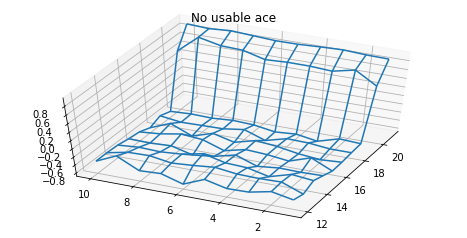

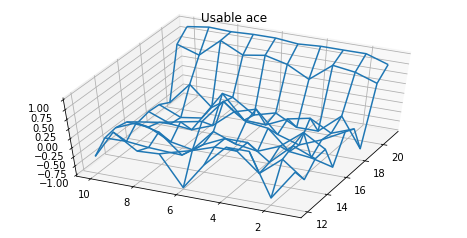

In [7]:
visualize_blackjack_v(v)

In [10]:
# First-visit, run with 500K episodes
start_time = time.time()
v_history = []
v = monte_carlo_policy_evaluation(every_visit=False,
                                  policy=policy,
                                  gamma=mdp.gamma(),
                                  episode_generator=episode_generator,
                                  num_episodes=500000,
                                  verbose=False,
                                  v_history=v_history)
print("Done in time:", time.time() - start_time)

Done in time: 843.2888514995575


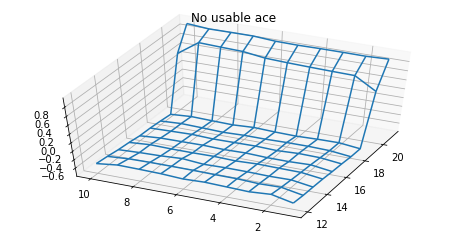

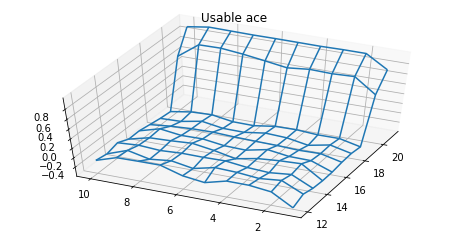

In [11]:
visualize_blackjack_v(v)